# Notebook Contents
* Transforming the excel data into a pandas dataframe
* Performing a t test that compares the mean deaths in afghanistan of 1989-1993 to 2013-2018
* Generating google maps screenshots of conflicts in afghanistan

In [1]:
import pandas as pd
import gmaps
import numpy as np
import requests
import time
from ipywidgets.embed import embed_minimal_html
import matplotlib.pyplot as plt
import scipy.stats as stats
from scipy.stats import norm
import seaborn as sns
import math

In [2]:
url = 'http://ucdpapi.pcr.uu.se/api/gedevents/19.1?pagesize=1&page=1'

filepath = 'Data_Files/ged191.xlsx'

data = pd.read_excel(filepath)

In [3]:
data_df = pd.DataFrame(data)
data_df.head()

,id,year,active_year,type_of_violence,conflict_new_id,conflict_name,dyad_new_id,dyad_name,side_a_new_id,gwnoa,...,date_prec,date_start,date_end,deaths_a,deaths_b,deaths_civilians,deaths_unknown,low,best,high
0,67972,2013,1,1,11347,Mali: Government,12571,Government of Mali - MUJAO,72,432.0,...,2,2013-01-11,2013-01-12,12,16,3,0,31,31,50
1,23385,2004,1,3,583,FNI - Civilians,1050,FNI - Civilians,606,NaN,...,2,2004-01-14,2004-01-16,0,0,200,0,100,200,200
2,24255,2007,0,2,4600,CNDP - PARECO,5210,CNDP - PARECO,426,NaN,...,2,2007-12-13,2007-12-18,0,0,4,0,4,4,4
3,82612,2008,1,1,364,India: Kashmir,792,Government of India - Kashmir insurgents,141,750.0,...,2,2008-03-04,2008-03-05,0,2,0,0,2,2,2
4,82645,2008,1,1,364,India: Kashmir,792,Government of India - Kashmir insurgents,141,750.0,...,2,2008-06-30,2008-07-01,1,11,0,0,12,12,12


In [4]:
df_year=[]
df_month=[]
df_day=[]
df_date = data_df['date_start'].astype(str).str.split('-')
df_date = df_date.reset_index()
for i in range(len(df_date)):
   df_year.append(df_date.loc[i][1][0])
   df_month.append(df_date.loc[i][1][1])
   df_day.append(df_date.loc[i][1][2][:2])
data_df['year2']=df_year
data_df['month']=df_month
data_df['day']=df_day
data_df

,id,year,active_year,type_of_violence,conflict_new_id,conflict_name,dyad_new_id,dyad_name,side_a_new_id,gwnoa,...,deaths_a,deaths_b,deaths_civilians,deaths_unknown,low,best,high,year2,month,day
0,67972,2013,1,1,11347,Mali: Government,12571,Government of Mali - MUJAO,72,432.0,...,12,16,3,0,31,31,50,2013,01,11
1,23385,2004,1,3,583,FNI - Civilians,1050,FNI - Civilians,606,NaN,...,0,0,200,0,100,200,200,2004,01,14
2,24255,2007,0,2,4600,CNDP - PARECO,5210,CNDP - PARECO,426,NaN,...,0,0,4,0,4,4,4,2007,12,13
3,82612,2008,1,1,364,India: Kashmir,792,Government of India - Kashmir insurgents,141,750.0,...,0,2,0,0,2,2,2,2008,03,04
4,82645,2008,1,1,364,India: Kashmir,792,Government of India - Kashmir insurgents,141,750.0,...,1,11,0,0,12,12,12,2008,06,30
5,158618,2011,1,1,354,Turkey: Kurdistan,781,Government of Turkey - PKK,115,640.0,...,0,13,0,0,13,13,30,2011,12,17
6,87396,1997,0,3,523,ULFA - Civilians,990,ULFA - Civilians,326,NaN,...,0,0,1,0,1,1,1,1997,07,04
7,60774,2013,1,1,283,DR Congo (Zaire): Government,10509,Government of DR Congo (Zaire) - APCLS,89,490.0,...,0,0,0,80,70,80,80,2013,03,03
8,25360,2010,1,1,337,Somalia: Government,750,Government of Somalia - Al-Shabaab,95,520.0,...,0,0,0,11,11,11,11,2010,06,30
9,11995,2003,1,1,288,Chad: Government,616,Government of Chad - MDJT,87,483.0,...,0,2,0,0,2,2,72,2003,03,25


In [5]:
# CREATE CLEANED DATAFRAME WITH ALL COUNTRIES
heatmap_df = data_df[['year','country','latitude', 'longitude', 'best']]
heatmap_df

,year,country,latitude,longitude,best
0,2013,Mali,14.943290,-3.894740,31
1,2004,DR Congo (Zaire),1.769722,30.775833,200
2,2007,DR Congo (Zaire),-1.651944,28.876944,4
3,2008,India,34.378934,74.725490,2
4,2008,India,34.372601,74.167293,12
5,2011,Turkey,38.382704,40.084215,13
6,1997,India,26.000000,93.000000,1
7,2013,DR Congo (Zaire),-1.250000,29.080000,80
8,2010,Somalia,2.066667,45.366667,11
9,2003,Chad,21.358333,17.000550,2


In [6]:
# Store 'Lat' and 'Lng' into  locations 
locations = heatmap_df[['latitude', 'longitude']].astype(float)

# Convert best death guess to float and store
deaths = heatmap_df['best'].astype(float)

years = heatmap_df['year'].astype(int).unique()

years.astype(int)
years.sort()
years

array([1989, 1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999,
       2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010,
       2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018])

In [8]:
fig = gmaps.figure()

heat_layer = gmaps.heatmap_layer(locations, weights=deaths, 
                                 dissipating=False, max_intensity=100,
                                 point_radius = .5)
fig.add_layer(heat_layer)
fig

Figure(layout=FigureLayout(height='420px'))

In [59]:
afg_df = heatmap_df.loc[heatmap_df['country'] == 'Afghanistan']
mean_lat = afg_df['latitude'].mean()
mean_long = afg_df['longitude'].mean()
mean_location = [mean_lat, mean_long]

# GMAPS does not allow me to save the png (at least in a useful way)
# Need to go by year, then create screenshot for each year
year = 2018

# Get data for particular year in DataFrame
year_df = afg_df.loc[afg_df['year'] == year]

# Get latitude and longitude for each
year_locations = year_df[['latitude', 'longitude']]

# Get number of deaths
year_deaths = year_df['best']

# Create figure
fig = gmaps.figure(zoom_level = 5.5, center = mean_location, layout={
        'width': '500px',
        'height': '600px',
        'padding': '3px',
        'border': '1px solid black'
})

# Add heatmap weighted
heat_layer = gmaps.heatmap_layer(year_locations, weights=year_deaths, 
                             dissipating=False, max_intensity=100,
                             point_radius = .05)

fig.add_layer(heat_layer)
fig

Figure(layout=FigureLayout(border='1px solid black', height='600px', padding='3px', width='500px'))

In [11]:
# Group deaths in Afghanistan by year
afg_grp = afg_df[['best', 'country', 'year']].groupby('year').sum().reset_index()
afg_grp.head()

,year,best
0,1989,5411
1,1990,1514
2,1991,3553
3,1992,4385
4,1993,4105


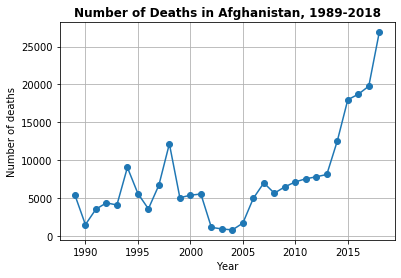

In [47]:
# Plot yearly deaths
afg = plt.plot(afg_grp['year'], afg_grp['best'], marker = 'o')
plt.title('Number of Deaths in Afghanistan, 1989-2018', weight = 'bold')
plt.xlabel('Year')
plt.ylabel('Number of deaths')
plt.grid()
plt.savefig('images/Afghanistan_Deaths_By_Year')

## Perform t Test
* Group 1 = Number of deaths per month from 1989 - 1994
* Group 2 = Number of deaths per month from 2013 - 2018

* $H_{0}$ : mean(Group 1) = mean(Group 2)


In [14]:
# CREATE T TEST DATAFRAME (USES MONTH/DAY)
month_df = data_df[['country', 'year2', 'month', 'day', 'best']]
afg_df = month_df.loc[month_df['country'] == 'Afghanistan']

new_names = ['Country', 'Year', 'Month', 'Day', 'Best Estimate of Deaths']
afg_df.columns = new_names

afg_df.head()

,Country,Year,Month,Day,Best Estimate of Deaths
12,Afghanistan,2012,04,11,25
17,Afghanistan,2012,09,14,6
18,Afghanistan,2012,09,27,11
19,Afghanistan,2012,10,15,9
20,Afghanistan,2012,10,15,8


In [51]:
# Group each month together in grouped DF
month_grp = afg_df.groupby(['Year', 'Month']).sum()


months_grp = pd.DataFrame(month_grp).reset_index()
months_grp.head()

,Year,Month,Best Estimate of Deaths
0,1989,01,714
1,1989,02,160
2,1989,03,1744
3,1989,04,494
4,1989,05,454


In [52]:
# Create groups with monthly deaths from 1989 - 1994

months1 = months_grp.loc[months_grp['Year'] == '1989']
months2 = months_grp.loc[months_grp['Year'] == '1990']
months3 = months_grp.loc[months_grp['Year'] == '1991']
months4 = months_grp.loc[months_grp['Year'] == '1992']
months5 = months_grp.loc[months_grp['Year'] == '1993']
months6 = months_grp.loc[months_grp['Year'] == '1994']

In [17]:
# Create dataframe containing all of those values
months_df = months1.append(months2)
months_df = months_df.append(months3)
months_df = months_df.append(months4)
months_df = months_df.append(months5)
months_df = months_df.append(months6)

# Get number of deaths for each month
grp1_deaths = list(months_df['Best Estimate of Deaths'])


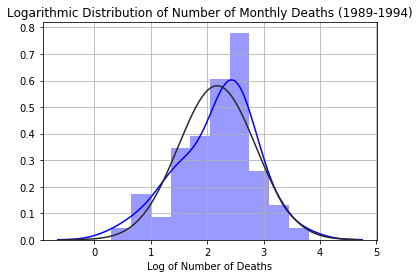

In [40]:
log1 = []
for i in grp1_deaths:
    log1.append(math.log10(i))


# SHOW LOG DISTRIBUTION    
sns.distplot(log1, hist = True, bins = 10, fit = norm, \
             color = 'blue', axlabel = "Log of Number of Deaths") 
plt.title("Logarithmic Distribution of Number of Monthly Deaths (1989-1994)")
plt.grid()
plt.savefig('images/Early_Deaths_Distribution')

In [53]:
# Create group with monthly deaths from 2013 - 2018
months1a = months_grp.loc[months_grp['Year'] == '2013']
months2a = months_grp.loc[months_grp['Year'] == '2014']
months3a = months_grp.loc[months_grp['Year'] == '2015']
months4a = months_grp.loc[months_grp['Year'] == '2016']
months5a = months_grp.loc[months_grp['Year'] == '2017']
months6a = months_grp.loc[months_grp['Year'] == '2018']

In [54]:
# Create dataframe containing all of those values
months_dfa = months1a.append(months2a)
months_dfa = months_dfa.append(months3a)
months_dfa = months_dfa.append(months4a)
months_dfa = months_dfa.append(months5a)
months_dfa = months_dfa.append(months6a)

# Get number of deaths for each month
grp2_deaths = months_dfa['Best Estimate of Deaths']

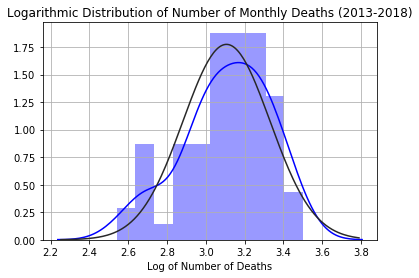

In [57]:
log2 = []
for i in grp2_deaths:
    log2.append(math.log10(i))

# SHOW LOG DISTRIBUTION    
sns.distplot(log2, hist = True, bins = 10, fit = norm, \
             color = 'blue', axlabel = "Log of Number of Deaths") 
plt.title("Logarithmic Distribution of Number of Monthly Deaths (2013-2018)")
plt.grid()
plt.savefig('images/Late_Deaths_Distribution')

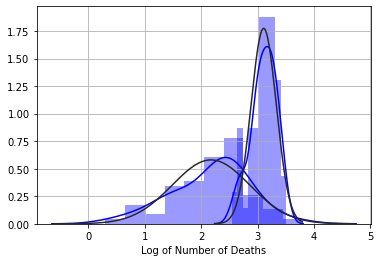

In [36]:
# Compare distributions
sns.distplot(log1, hist = True, bins = 10, fit = norm, \
             color = 'blue', axlabel = "Log of Number of Deaths") 
sns.distplot(log2, hist = True, bins = 10, fit = norm, \
             color = 'blue', axlabel = "Log of Number of Deaths") 
plt.grid()

In [58]:
# 2 Sample t test 
stats.ttest_ind(log1, log2, equal_var = False)

Ttest_indResult(statistic=-10.440345372174463, pvalue=1.9019010383395427e-16)